In [1]:
import sys
sys.path.append("../script/")

import Functions
from Engine import Engine


from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import importlib
from time import time
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import numpy as np
import pandas as pd
from time import time

In [2]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.utils import shuffle
def plot_roc_curve(true_y, y_prob):
    """
    plots the roc curve based of the probabilities
    """
    
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    print(roc_auc_score(true_y,prob[:,1]))

# data

In [4]:
# ref from 2segp github
# Classification dataset names - choose from following datasets 

CLASS_DATASET_NAMES = ['bcw','heart','iono','parks','sonar']
dataset_name = CLASS_DATASET_NAMES[2]


# Load the dataset
Xy = np.genfromtxt('test_data/'+dataset_name+'.csv', delimiter=',')
X = Xy[:, :-1]
y = Xy[:, -1]   # last column is the label

# simple operators

boost_num = 1000

seed = np.random.randint(9999999)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

# model

In [5]:
def to_one_hot(y,yt):
    le = LabelEncoder()
    ohe = OneHotEncoder()
    y_train = le.fit_transform(y)
    y_one_hot = ohe.fit_transform(y_train.reshape(-1,1))
    
    y_test = le.transform(yt)
    yt_one_hot = ohe.transform(y_test.reshape(-1,1))
    
    return y_train,y_test,y_one_hot,yt_one_hot

def initial(y_one_hot):
    init_log_odds = np.sum(y_one_hot,axis=0)/y_one_hot.shape[0]
    
    init_p = np.exp(init_log_odds)
    init_p = init_p/(1+init_p)

    return init_log_odds,init_p

def initial_first_bin(init_log_odds,init_p,X):
    log_odds = np.repeat(init_log_odds,X.shape[0],0)
    p = np.repeat(init_p,X.shape[0],0)
    
    return log_odds,p
    
def update_log_p(grads,log_odds,p,learning_rate):
    log_odds_1 = log_odds + learning_rate * grads
    
    p_1 = np.exp(log_odds_1,where=log_odds_1 < 16,out=np.zeros(log_odds_1.shape)+16)
    p_1 = np.divide(p_1,(1+p_1),where=p_1 < 16,out=np.ones(p_1.shape))
    
    # p_1 = np.exp(log_odds_1)
    # p_1 = np.divide(p_1,(1+p_1))

    return log_odds_1,p_1

def predict(X,init_log_odds,init_p,learning_rate,stack):
    log_odds,p = initial_first_bin(init_log_odds,init_p,X)

    for node in stack:
        grads = node.predict_grad(X)
        
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)
    return p

In [6]:
train_acc = []
test_acc = []

stack = []

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

init_log_odds,init_p = initial(y_train_one_hot)
log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)

test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

In [35]:
learning_rate = 0.1
bins = 2
lam = 3
stack = []
losses = []
num_features = X_train.shape[1]

max_depth = 1
tolerance = 0.01


total_size = 10
elite_size = 10

eg = Engine(Functions.simple_opset,X_train,y_train,y_train_one_hot,learning_rate,bins,max_depth,lam)
eg.initialize_nodes(log_odds,p)
origin_features = eg.nodes.copy()
origin_losses = eg.losses.copy()
stack.extend(eg.nodes)
losses.extend(origin_losses)

for i in range(100):
    for j in range(6):
        eg.evolve(total_size,elite_size,log_odds=log_odds,p=p,tolerance=tolerance,verbose=0)
    stack,losses = eg.adding_unique_node(stack,losses,eg.nodes[num_features:],tolerance=tolerance)
    eg.nodes = origin_features.copy()
    eg.losses = origin_losses.copy()
    print(len(stack),sum([n.numNode for n in stack]),i)
    # if len(stack) > 8000:
    #         break


39 49 0
47 91 1
50 96 2
52 102 3
54 110 4
54 110 5
57 121 6
58 116 7
59 119 8
59 119 9
60 124 10
63 137 11
64 140 12
66 140 13
67 143 14
68 146 15
69 149 16
72 158 17
72 158 18
73 159 19
74 162 20
74 162 21
74 160 22
74 160 23
74 160 24
74 160 25
74 160 26
75 163 27
77 169 28
77 169 29
78 174 30
79 179 31
79 179 32
81 191 33
81 191 34
83 199 35
84 200 36
84 200 37
84 200 38
85 205 39
87 211 40
89 227 41
90 230 42
90 230 43
91 233 44
92 236 45
92 234 46
93 237 47
93 237 48
95 241 49
95 241 50
95 239 51
96 240 52
97 243 53
97 243 54
97 243 55
97 243 56
97 243 57
97 243 58
97 243 59
97 243 60
97 243 61
97 243 62
97 243 63
97 243 64
97 243 65
97 243 66
97 243 67
97 243 68
97 243 69
97 243 70
97 243 71
97 243 72
97 243 73
99 259 74
100 264 75
101 271 76
101 271 77
101 271 78
101 271 79
101 271 80
101 271 81
101 271 82
101 271 83
102 274 84
103 277 85
103 277 86
103 277 87
103 277 88
103 277 89
103 277 90
104 282 91
104 282 92
104 282 93
106 296 94
106 296 95
105 287 96
108 300 97
108 300 98

0.9510204081632653 0.9056603773584906 0.9150943396226415
21.219109795540398 15.528666984326339 15.4937540768973
0.9714285714285714 0.9150943396226415 0.9150943396226415
14.598745852978482 14.123618784975546 14.006716633352895
0.9714285714285714 0.9150943396226415 0.9150943396226415
12.059400996536642 13.872956381434213 13.766623098628097
0.9755102040816327 0.9150943396226415 0.9150943396226415
10.482075405487024 13.821878654245685 13.746315830687426
0.9795918367346939 0.9150943396226415 0.9150943396226415
9.29952841610719 13.895376800571825 13.746315830687426
0.9795918367346939 0.9150943396226415 0.9150943396226415
8.31497726319915 13.851647865870207 13.746315830687426
0.9877551020408163 0.9150943396226415 0.9150943396226415
7.505893662532075 13.835580207092999 13.746315830687426
0.9877551020408163 0.9150943396226415 0.9150943396226415
6.797938224051717 13.826506052394596 13.746315830687426
0.9877551020408163 0.9150943396226415 0.9150943396226415
6.174932762964741 13.825973906179758 13

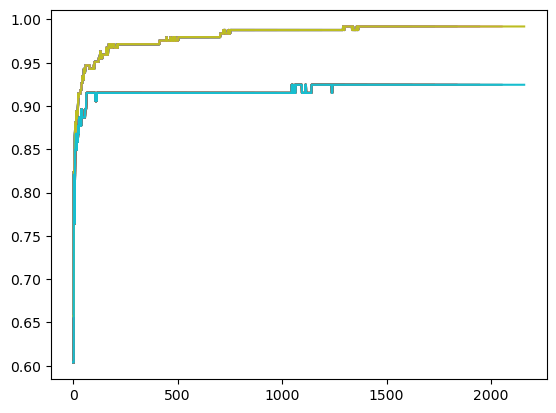

In [39]:
def training_data(node,y_train_one_hot,log_odds,p,test_log_odds=None,test_p=None):
    grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
    log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

    if test_log_odds != None:
        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)

        return log_odds,p,test_log_odds,test_p
    
    return log_odds,p

def get_order(stack,y_train_one_hot,log_odds,p,previous_sse):
    score = []
    
    for node in stack:
        log_odds,p = training_data(node,y_train_one_hot,log_odds,p)
        
        sse = np.sum(np.power(y_train_one_hot - p,2))
        score.append(previous_sse - sse)
        previous_sse = sse
    
    return [stack[i] for i in np.argsort(score)[::-1]]

y_train,y_test,y_train_one_hot,y_test_one_hot = to_one_hot(y_train,y_test)

fits = [i.estimator.loss for i in stack]
a = [stack[i] for i in np.argsort(fits)]

log_odds,p = initial_first_bin(init_log_odds,init_p,X_train)
test_log_odds,test_p = initial_first_bin(init_log_odds,init_p,X_test)

# a = get_order(a,y_train_one_hot,log_odds,p,previous_sse=np.sum(np.power(y_train_one_hot - p,2)))

train_acc = []
test_acc = []

train_sse = []
test_sse = []


counts = []

for _ in range(20):
    score = []
    
    for i,node in enumerate(a):
        # node.estimator.lam = 3
        grads = node.estimator.set_grads_bin(y_train_one_hot-p,p)
        log_odds,p = update_log_p(grads,log_odds,p,learning_rate)

        test_grads = node.predict_grad(X_test)
        test_log_odds,test_p = update_log_p(test_grads,test_log_odds,test_p,learning_rate)


        train_sse.append(np.sum(np.power(y_train_one_hot - p,2)))
        test_sse.append(np.sum(np.power(y_test_one_hot - test_p,2)))
        # score.append(previous_sse - train_sse[-1])
        # previous_sse = train_sse[-1]


        pred = np.argmax(p,axis=1)
        train_acc.append(accuracy_score(pred,y_train))
        test_pred = np.argmax(test_p,axis=1)
        test_acc.append(accuracy_score(test_pred,y_test))
    
    # a = [a[i] for i in np.argsort(score)[::-1]]

    plt.plot(train_acc)
    plt.plot(test_acc)
    print(train_acc[-1],test_acc[-1],max(test_acc))

    # plt.plot(train_sse)
    # plt.plot(test_sse)
    print(train_sse[-1],test_sse[-1],min(test_sse))

    # plt.legend(["train","test"])
    # plt.show()
    

In [40]:
sum([n.numNode for n in stack])

300

              precision    recall  f1-score   support

           0    1.00000   0.97619   0.98795        84
           1    0.98773   1.00000   0.99383       161

    accuracy                        0.99184       245
   macro avg    0.99387   0.98810   0.99089       245
weighted avg    0.99194   0.99184   0.99181       245

              precision    recall  f1-score   support

           0    1.00000   0.80952   0.89474        42
           1    0.88889   1.00000   0.94118        64

    accuracy                        0.92453       106
   macro avg    0.94444   0.90476   0.91796       106
weighted avg    0.93291   0.92453   0.92278       106



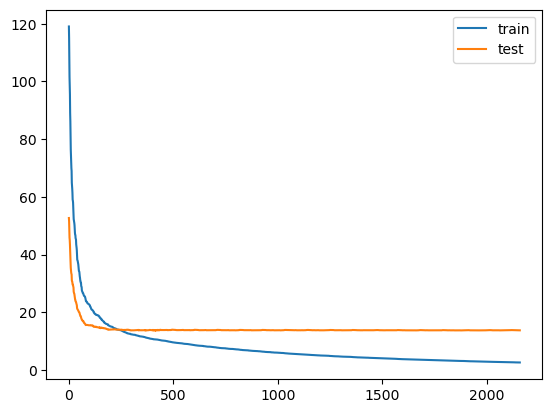

In [41]:
plt.plot(train_sse)
plt.plot(test_sse)
plt.legend(["train","test"])    
print(classification_report(y_train,np.argmax(p,axis=1),digits=5))
print(classification_report(y_test,np.argmax(test_p,axis=1),digits=5))

# Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train)))
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00       161

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        42
           1       0.89      0.92      0.91        64

    accuracy                           0.89       106
   macro avg       0.88      0.88      0.88       106
weighted avg       0.89      0.89      0.89       106



# XGBoost

In [26]:
import xgboost


In [27]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train,y_train)

print(classification_report(y_train,xgb.predict(X_train),digits=5))
print(classification_report(y_test,xgb.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - xgb.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - xgb.predict_proba(X_test),2)))

import json

def item_generator(json_input, lookup_key):
    if isinstance(json_input, dict):
        for k, v in json_input.items():
            if k == lookup_key:
                yield v
            else:
                yield from item_generator(v, lookup_key)
    elif isinstance(json_input, list):
        for item in json_input:
            yield from item_generator(item, lookup_key)

def tree_depth(json_text):
    json_input = json.loads(json_text)
    depths = list(item_generator(json_input, 'depth'))
    return max(depths) + 1 if len(depths) != 0 else 1


booster = xgb.get_booster()

tree_df = booster.trees_to_dataframe()
depths = [tree_depth(x) for x in booster.get_dump(dump_format = "json")]
len(depths),np.average(depths),len(tree_df)

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        84
           1    1.00000   1.00000   1.00000       161

    accuracy                        1.00000       245
   macro avg    1.00000   1.00000   1.00000       245
weighted avg    1.00000   1.00000   1.00000       245

              precision    recall  f1-score   support

           0    0.89744   0.83333   0.86420        42
           1    0.89552   0.93750   0.91603        64

    accuracy                        0.89623       106
   macro avg    0.89648   0.88542   0.89011       106
weighted avg    0.89628   0.89623   0.89549       106

train: 0.22912939505326296
test: 19.980579784435132


(100, 2.12, 616)

# GDBT

In [28]:
from sklearn.ensemble import GradientBoostingClassifier

In [29]:
clf = GradientBoostingClassifier()
clf.fit(X_train,y_train)

print(classification_report(y_train,clf.predict(X_train),digits=5))
print(classification_report(y_test,clf.predict(X_test),digits=5))
print("train:",np.sum(np.power(y_train_one_hot - clf.predict_proba(X_train),2)))
print("test:",np.sum(np.power(y_test_one_hot - clf.predict_proba(X_test),2)))

len(clf.estimators_),sum([ est.tree_.node_count for ests in clf.estimators_ for est in ests])

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        84
           1    1.00000   1.00000   1.00000       161

    accuracy                        1.00000       245
   macro avg    1.00000   1.00000   1.00000       245
weighted avg    1.00000   1.00000   1.00000       245

              precision    recall  f1-score   support

           0    0.97143   0.80952   0.88312        42
           1    0.88732   0.98438   0.93333        64

    accuracy                        0.91509       106
   macro avg    0.92938   0.89695   0.90823       106
weighted avg    0.92065   0.91509   0.91344       106

train: 0.03007644601307774
test: 16.88426528103971


(100, 1430)